# Eksperimen - Diabetes Prediction

Dataset ini berisi informasi kesehatan untuk prediksi diabetes dengan 768 baris dan 9 kolom.

**Kolom Dataset:**
- Pregnancies: Jumlah kehamilan
- Glucose: Level glukosa dalam darah
- BloodPressure: Tekanan darah
- SkinThickness: Ketebalan kulit
- Insulin: Level insulin dalam darah
- BMI: Body mass index
- DiabetesPedigreeFunction: Persentase diabetes
- Age: Usia
- Outcome: Hasil (1=Diabetes, 0=No Diabetes)

**Tujuan**: Preprocessing data untuk prediksi diabetes

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Dataset

In [2]:
# Load dataset
df = pd.read_csv(r'D:\Perkuliahan\Asah led by Dicoding\Submission Proyek\SMSML_Angga\Eksperimen_SML_Angga-Yulian-Adi-Pradana\diabetes_raw\diabetes.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nJumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Dataset shape: (768, 9)

Jumlah baris: 768
Jumlah kolom: 9


In [3]:
# Preview dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3. Exploratory Data Analysis (EDA)

### 3.1 Missing Values

In [5]:
# Cek missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Values:")
print(missing_df)

# Visualisasi
if len(missing_df) > 0:
    plt.figure(figsize=(10, 4))
    missing_df['Percentage'].plot(kind='bar', color='coral')
    plt.title('Percentage of Missing Values')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Columns')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found")

Missing Values:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

No missing values found


### 3.2 Distribusi Target (Churn)

Distribusi Outcome:
0    500
1    268
Name: Outcome, dtype: int64

Persentase:
0    65.104167
1    34.895833
Name: Outcome, dtype: float64


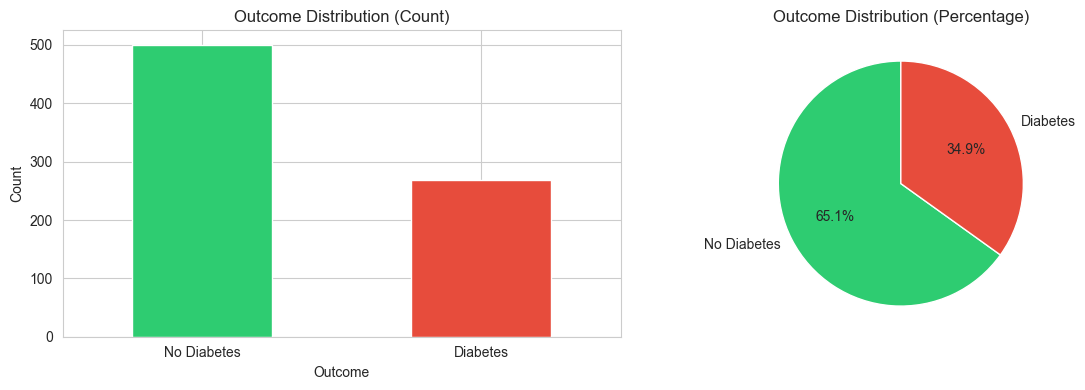


Imbalance Ratio: 1.87
Dataset memiliki class imbalance yang cukup signifikan


In [6]:
# Distribusi Outcome
outcome_dist = df['Outcome'].value_counts()
outcome_pct = df['Outcome'].value_counts(normalize=True) * 100

print("Distribusi Outcome:")
print(outcome_dist)
print("\nPersentase:")
print(outcome_pct)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
outcome_dist.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Outcome Distribution (Count)')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Outcome')
axes[0].set_xticklabels(['No Diabetes', 'Diabetes'], rotation=0)

# Pie chart
axes[1].pie(outcome_dist, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Outcome Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Cek imbalance
imbalance_ratio = outcome_pct.max() / outcome_pct.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 1.5:
    print("Dataset memiliki class imbalance yang cukup signifikan")
else:
    print("Dataset relatif balance")

### 3.3 Distribusi Fitur Numerik

In [7]:
# Semua fitur adalah numerik kecuali Outcome
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("Fitur Numerik:")
for feat in numeric_features:
    print(f"  - {feat}")
print("\nStatistik Deskriptif:")
print(df[numeric_features].describe())

Fitur Numerik:
  - Pregnancies
  - Glucose
  - BloodPressure
  - SkinThickness
  - Insulin
  - BMI
  - DiabetesPedigreeFunction
  - Age

Statistik Deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471

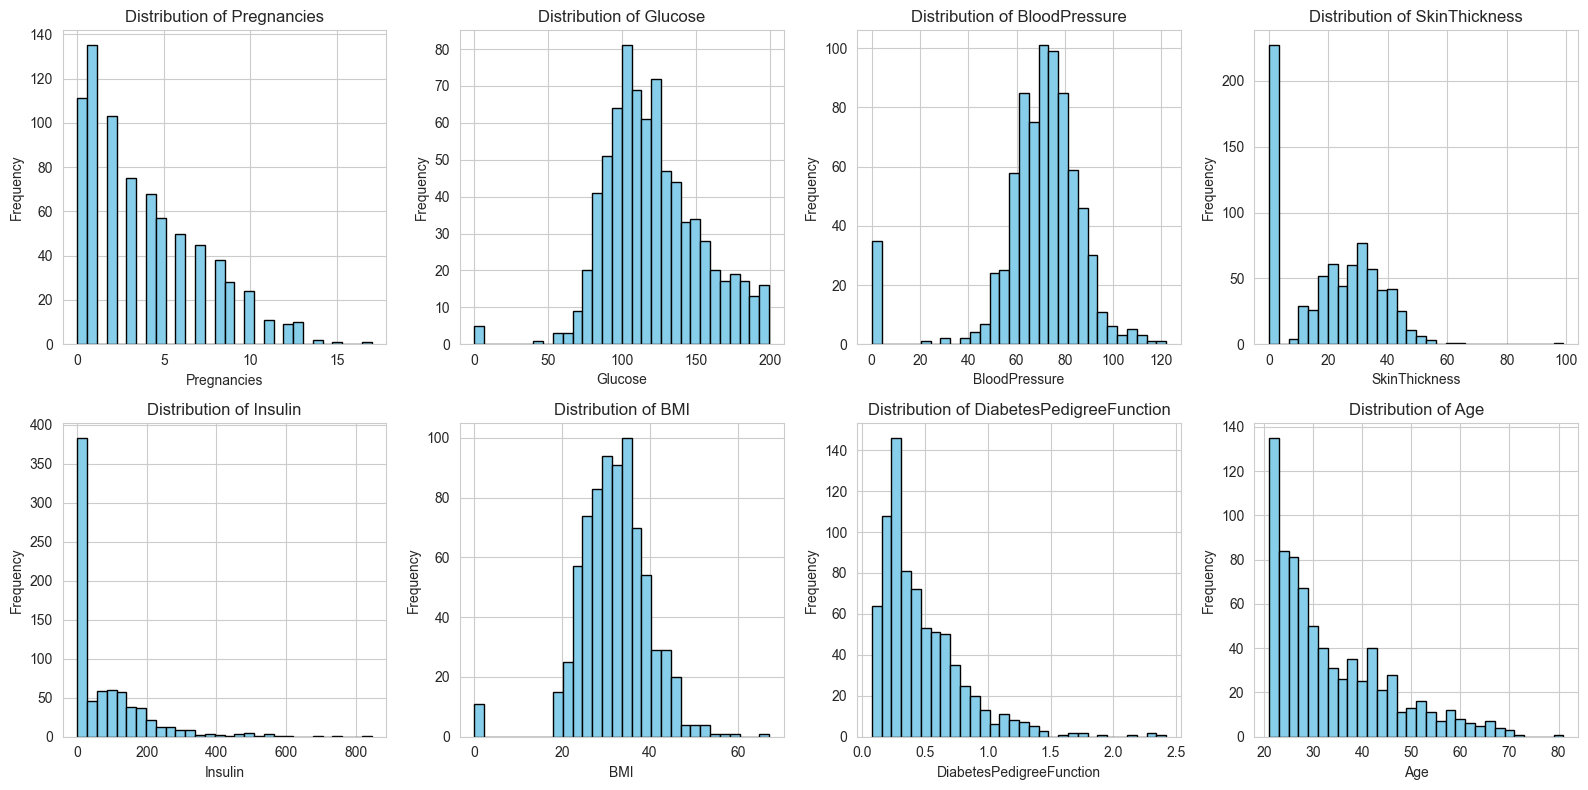

In [8]:
# Visualisasi distribusi
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(numeric_features):
    axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3.4 Korelasi Fitur Numerik

Correlation Matrix:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


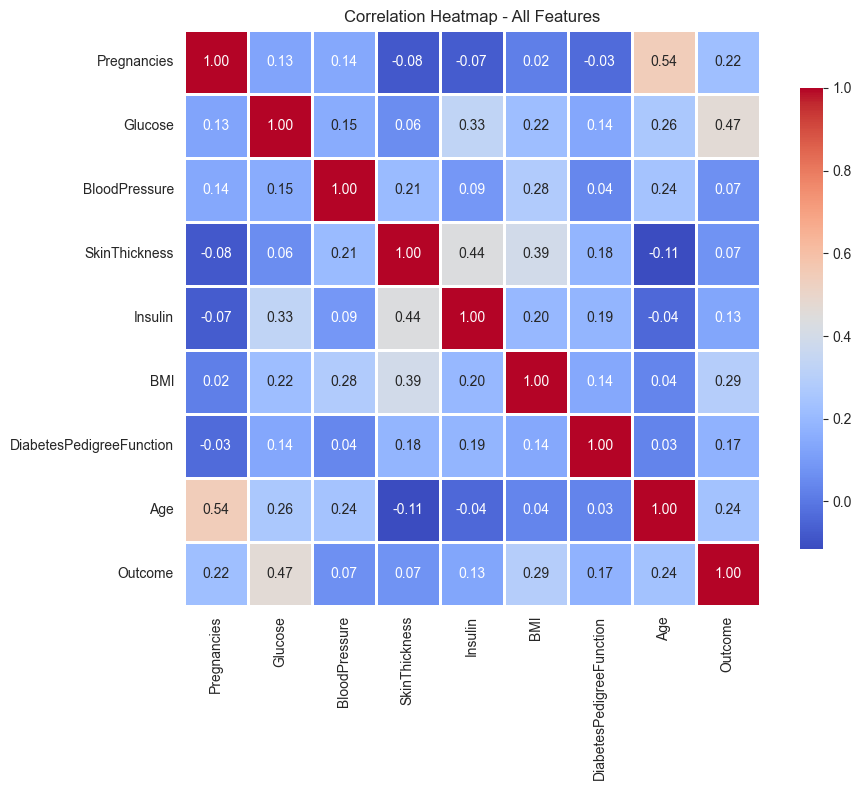

In [9]:
# Hitung korelasi
correlation = df[numeric_features + ['Outcome']].corr()

print("Correlation Matrix:")
print(correlation['Outcome'].sort_values(ascending=False))

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Features')
plt.tight_layout()
plt.show()

### 3.5 Outlier Detection

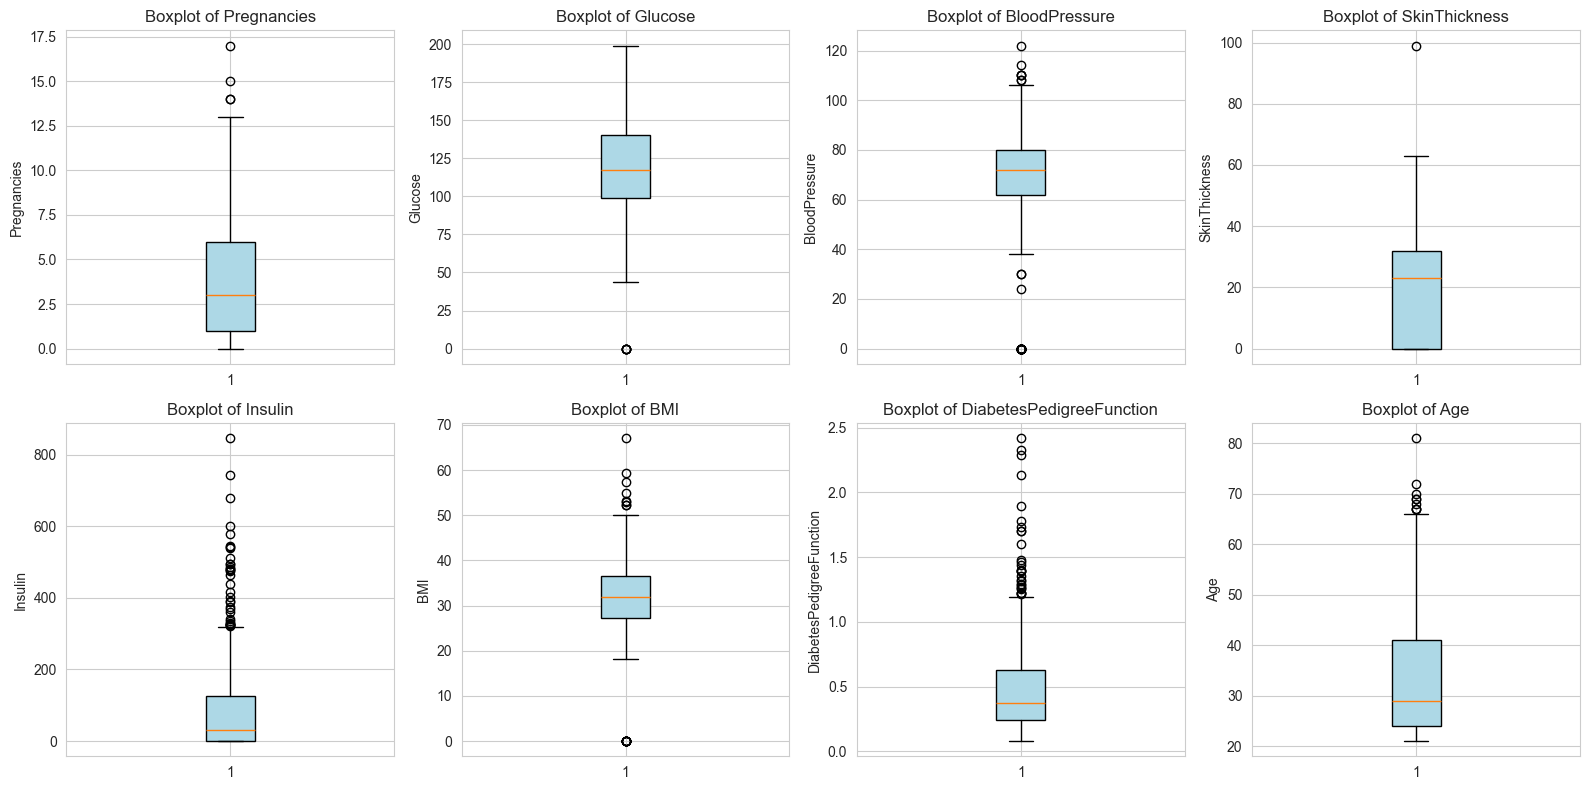

In [10]:
# Boxplot untuk deteksi outlier
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(numeric_features):
    axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue'))
    axes[idx].set_title(f'Boxplot of {col}')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

In [11]:
# Hitung outlier menggunakan IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Outlier Detection (IQR Method):")
for col in numeric_features:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  - Outliers: {n_outliers} ({n_outliers/len(df)*100:.2f}%)")
    print(f"  - Range: [{lower:.2f}, {upper:.2f}]")

Outlier Detection (IQR Method):

Pregnancies:
  - Outliers: 4 (0.52%)
  - Range: [-6.50, 13.50]

Glucose:
  - Outliers: 5 (0.65%)
  - Range: [37.12, 202.12]

BloodPressure:
  - Outliers: 45 (5.86%)
  - Range: [35.00, 107.00]

SkinThickness:
  - Outliers: 1 (0.13%)
  - Range: [-48.00, 80.00]

Insulin:
  - Outliers: 34 (4.43%)
  - Range: [-190.88, 318.12]

BMI:
  - Outliers: 19 (2.47%)
  - Range: [13.35, 50.55]

DiabetesPedigreeFunction:
  - Outliers: 29 (3.78%)
  - Range: [-0.33, 1.20]

Age:
  - Outliers: 9 (1.17%)
  - Range: [-1.50, 66.50]


### 3.6 Relationship dengan Target

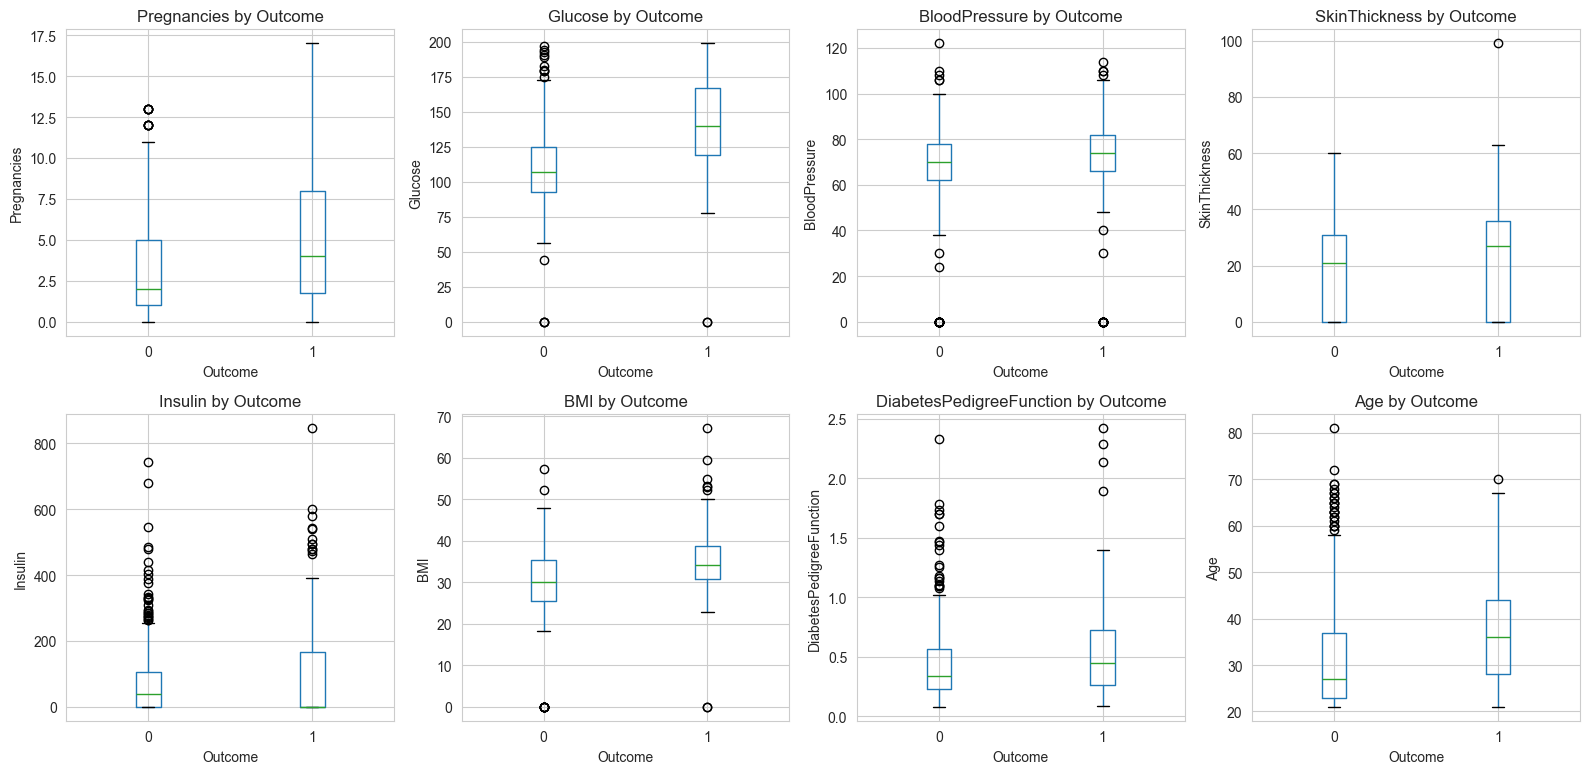

In [12]:
# Comparison by Outcome
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(numeric_features):
    df.boxplot(column=col, by='Outcome', ax=axes[idx])
    axes[idx].set_title(f'{col} by Outcome')
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel(col)

plt.suptitle('')
plt.tight_layout()
plt.show()

## 4. PREPROCESSING

### Tahapan:
1. Drop duplicates
2. Handle missing values (median)
3. Scaling numeric features
4. Train-test split
5. Apply SMOTE (handle imbalance)
6. Save preprocessed data

### 4.1 Drop Duplicates

In [13]:
# Cek duplikat
print(f"Jumlah duplikat sebelum: {df.duplicated().sum()}")

# Drop duplikat
df = df.drop_duplicates()

print(f"Jumlah duplikat setelah: {df.duplicated().sum()}")
print(f"Shape setelah drop duplicates: {df.shape}")

Jumlah duplikat sebelum: 0
Jumlah duplikat setelah: 0
Shape setelah drop duplicates: (768, 9)


### 4.2 Handle Missing Values

In [14]:
# Handle missing values (jika ada)
missing_before = df.isnull().sum().sum()
print(f"Total missing values before: {missing_before}")

if missing_before > 0:
    for col in df.columns:
        if df[col].isna().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"{col} filled with median: {median_val:.2f}")

missing_after = df.isnull().sum().sum()
print(f"Total missing values after: {missing_after}")

Total missing values before: 0
Total missing values after: 0


### 4.3 Feature Scaling

In [15]:
# Copy dataframe untuk preprocessing
df_processed = df.copy()

# Scale semua fitur kecuali Outcome
features_to_scale = [col for col in df_processed.columns if col != 'Outcome']

print("Features to scale:")
for feat in features_to_scale:
    print(f"  - {feat}")

scaler = StandardScaler()
df_processed[features_to_scale] = scaler.fit_transform(df_processed[features_to_scale])

print("\nScaling completed")
print("\nScaled features statistics:")
print(df_processed[features_to_scale].describe())

Features to scale:
  - Pregnancies
  - Glucose
  - BloodPressure
  - SkinThickness
  - Insulin
  - BMI
  - DiabetesPedigreeFunction
  - Age

Scaling completed

Scaled features statistics:
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18   1.503427e-17   1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00  -3.572597e+00  -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01  -3.673367e-01  -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01   1.496408e-01   1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01   5.632228e-01   7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00   2.734528e+00   4.921866e+00  6.652839e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  7.680000e+02 

### 4.4 Train-Test Split

In [16]:
# Separate features and target
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

Features shape: (768, 8)
Target shape: (768,)

Target distribution:
0    500
1    268
Name: Outcome, dtype: int64
0    65.104167
1    34.895833
Name: Outcome, dtype: float64


In [17]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set target distribution (BEFORE SMOTE):")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True) * 100)

Training set size: 614 (79.9%)
Test set size: 154 (20.1%)

Training set target distribution (BEFORE SMOTE):
0    400
1    214
Name: Outcome, dtype: int64
0    65.14658
1    34.85342
Name: Outcome, dtype: float64


### 4.5 Apply SMOTE (Handle Class Imbalance)

In [18]:
# Apply SMOTE untuk oversampling minority class
print("Handling Class Imbalance with SMOTE...")

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"\nSMOTE applied successfully!")
print(f"\nTraining set target distribution (AFTER SMOTE):")
print(pd.Series(y_train_resampled).value_counts())
print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)

print(f"\nTrain size BEFORE SMOTE: {len(y_train)}")
print(f"Train size AFTER SMOTE: {len(y_train_resampled)}")

Handling Class Imbalance with SMOTE...

SMOTE applied successfully!

Training set target distribution (AFTER SMOTE):
0    400
1    400
Name: Outcome, dtype: int64
0    50.0
1    50.0
Name: Outcome, dtype: float64

Train size BEFORE SMOTE: 614
Train size AFTER SMOTE: 800


### 4.6 Save Preprocessed Data

In [19]:
# Save ke folder namadataset_preprocessing
output_dir = './diabetes_preprocessing/'

# Save train and test sets (train sudah dengan SMOTE)
X_train_resampled.to_csv(output_dir + 'X_train.csv', index=False)
X_test.to_csv(output_dir + 'X_test.csv', index=False)
pd.DataFrame(y_train_resampled, columns=['Outcome']).to_csv(output_dir + 'y_train.csv', index=False)
pd.DataFrame(y_test, columns=['Outcome']).to_csv(output_dir + 'y_test.csv', index=False)

# Save full preprocessed data
df_processed.to_csv(output_dir + 'diabetes_preprocessed.csv', index=False)

print("Preprocessed data saved successfully!")
print(f"\nFiles saved:")
print(f"  - X_train.csv: {X_train_resampled.shape}")
print(f"  - X_test.csv: {X_test.shape}")
print(f"  - y_train.csv: {y_train_resampled.shape}")
print(f"  - y_test.csv: {y_test.shape}")
print(f"  - diabetes_preprocessed.csv: {df_processed.shape}")

Preprocessed data saved successfully!

Files saved:
  - X_train.csv: (800, 8)
  - X_test.csv: (154, 8)
  - y_train.csv: (800,)
  - y_test.csv: (154,)
  - diabetes_preprocessed.csv: (768, 9)
